<h1 style="font-family:Times New Roman;color:blue;">PARAMS RANDOM SEARCH, PLOTING AND DIFFERENT TYPES OF ALGORITHMS ON MACROECONOMIC DATA TO PREDICT INDEX</h1>

<h2>Get data:</h2>

In [40]:

import sys
sys.path.append("../getData")
sys.path.append("../../visualization")
sys.path.append("../functions")
sys.path.append("../Models")
import bdStocks
import bdMacro
import analyseDataModels 
import graficosJupyterNotebook as graficos
import numpy as np
import pandas as pd
import transformationsDataframes as tfataframe
pd.set_option('display.max_rows', None)

In [83]:
exchange="LSE"
indiceName="ftse100"
getsectors=True
getdescriptions=False
columnas=["netIncome","totalRevenue","stock"]
columnasPrecios=["Adjusted_close","stock"]
not_index=True
tamMinimo=50
mod=4
nivel_confianza=0.05
numberPreds=10

In [84]:
bd=bdStocks.getData()
#precios=bd.getPrizesByExchange(exchange,columnas=columnasPrecios)
#fundamentals=bd.getFundamentalsByExchange(exchange,bd=True,columnas=columnas)
indice=bd.getIndexPrizes(indiceName)
"""if getsectors:
    sectors=bd.getSectors(exchange)
    fundamentals["sector"]=fundamentals["stock"].transform(lambda t:sectors[t])
if   getdescriptions:
    descriptions=bd.getDescriptions(exchange)
    fundamentals["description"]=fundamentals["stock"].transform(lambda t:descriptions[t])
if not_index:
    precios.reset_index(inplace=True)
    fundamentals.reset_index(inplace=True)"""
    
events= bdMacro.devolverCalendario(exchange)

In [89]:
import datetime as dt
indice1=tfataframe.pasarAMensual(indice)
macro=events.fillna(method="ffill").join(indice1.loc[:,["Close"]],how="left")
if exchange=="MC":
    macro=macro.loc[events.index>=dt.datetime(2012,3,1)].drop(["unemploymentchange","gdpyoy"],axis=1)
elif exchange=="US":
    macro=macro.loc[events.index>=dt.datetime(2008,2,1)].drop(["auction","bloombergconsumerconfidencey","gdpqoq","buildingpermitsmom"],axis=1)
elif exchange=="XETRA":
    macro=macro.loc[events.index>=dt.datetime(2008,3,1)]
elif exchange=="PA":
    macro=macro.loc[events.index>=dt.datetime(2008,8,1)]
elif exchange=="LSE":
       macro=macro.loc[events.index>=dt.datetime(2008,3,1)].drop(["gdpyoy"],axis=1)    
macro

,cpimom,cpiyoy,retailsalesyoy,gfkcomsumerconfidence,unemploymentrate,manufacturingPMI,industrialProductionMoM,servicesPMI,cbiindustrialtrendorders,gdpqoq,ricshousebalance,housepriceindexyoy,halifaxhosuepriceindexyoy,Close
2008-03-01,0.7,2.5,5.5,-12.0,5.2,51.3,-0.1,54.0,7.0,0.6,-0.6,8.0,4.2,5818.60
2008-04-01,0.4,2.5,4.6,-24.0,5.2,51.3,0.3,52.1,-13.0,0.4,-2.1,6.7,1.1,5852.60
2008-05-01,0.8,3.0,4.2,-24.0,5.2,51.0,-0.5,50.4,-10.0,0.4,-1.3,5.2,-0.9,6087.30
2008-06-01,0.6,3.3,8.1,-34.0,5.3,50.0,0.2,49.8,1.0,0.3,-2.4,4.9,-3.8,6007.60
2008-07-01,0.7,3.8,2.2,-39.0,5.2,45.8,-0.8,47.1,-8.0,0.2,-2.0,3.7,-6.1,5479.90
2008-08-01,0.0,4.4,2.1,-36.0,5.4,44.3,-0.2,47.4,-13.0,0.0,-1.7,0.6,-8.8,5354.70
2008-09-01,0.6,4.7,3.3,-32.0,5.5,45.9,-0.4,49.2,-26.0,0.0,-1.8,-0.3,-10.9,5602.80
2008-10-01,0.5,5.2,1.8,-36.0,5.7,41.0,-0.6,46.0,-39.0,-0.5,-1.3,3.4,-12.4,4959.60
2008-11-01,-0.2,4.5,1.9,-35.0,5.8,41.5,-0.2,42.4,-38.0,-0.5,-2.2,-5.1,-13.7,4443.30
2008-12-01,-0.1,4.1,1.5,-33.0,6.0,34.4,-1.7,40.1,-35.0,-0.6,-2.6,-7.4,-14.9,4065.50


<h2>Plot data, is a time series but we will not take care of time in this tests: </h2>

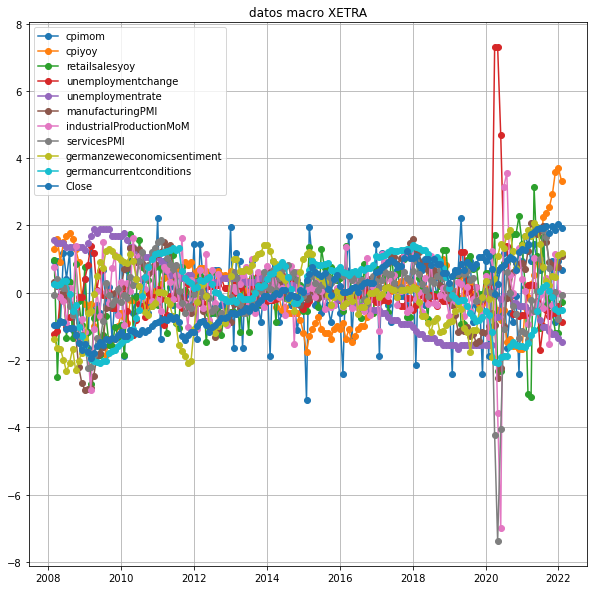

,cpimom,cpiyoy,retailsalesyoy,unemploymentchange,unemploymentrate,manufacturingPMI,industrialProductionMoM,servicesPMI,germanzeweconomicsentiment,germancurrentconditions,Close
cpimom,1.000000,0.230088,-0.005988,-0.016805,-0.065115,0.153461,0.107006,0.035135,0.045191,0.058848,0.107453
cpiyoy,0.230088,1.000000,-0.098903,-0.168777,-0.216966,0.195213,-0.030454,0.106585,-0.334212,0.227963,0.193169
retailsalesyoy,-0.005988,-0.098903,1.000000,-0.160576,-0.278125,0.259771,0.381298,0.293312,-0.032345,0.229545,0.250494
unemploymentchange,-0.016805,-0.168777,-0.160576,1.000000,-0.052680,-0.447015,-0.376355,-0.724996,0.110714,-0.313091,-0.031792
unemploymentrate,-0.065115,-0.216966,-0.278125,-0.052680,1.000000,-0.205424,0.001343,-0.126235,0.018765,-0.303016,-0.863897
manufacturingPMI,0.153461,0.195213,0.259771,-0.447015,-0.205424,1.000000,0.322830,0.567713,0.309505,0.468171,0.430389
industrialProductionMoM,0.107006,-0.030454,0.381298,-0.376355,0.001343,0.322830,1.000000,0.420584,0.076647,0.127164,0.046814
servicesPMI,0.035135,0.106585,0.293312,-0.724996,-0.126235,0.567713,0.420584,1.000000,-0.080368,0.598899,0.151634
germanzeweconomicsentiment,0.045191,-0.334212,-0.032345,0.110714,0.018765,0.309505,0.076647,-0.080368,1.000000,-0.318574,0.306614
germancurrentconditions,0.058848,0.227963,0.229545,-0.313091,-0.303016,0.468171,0.127164,0.598899,-0.318574,1.000000,0.184966


In [75]:
graficos.linearplot(macro,"datos macro "+exchange,True,*macro.columns)
macro.corr()

<h2>PCA Analysis to see which if we can reduce number of components: </h2

In [57]:
#pca
from sklearn.decomposition import PCA

X,pca=analyseDataModels.pca(macro,includeClose=False,n_components=5)
print(pca.explained_variance_ratio_.round(3))
pd.DataFrame(pca.components_.T,index=macro.columns[0:11])

[0.99  0.006 0.004 0.    0.   ]


,0,1,2,3,4
cpimom,4.197764e-08,2.890051e-07,1.349042e-07,-1.912430e-03,-6.042831e-03
cpiyoy,3.401433e-07,-1.398889e-06,2.004865e-06,-3.704298e-03,4.012511e-02
ismmanufacturingPMI,1.044496e-06,2.681328e-06,-4.791284e-07,-2.176586e-02,-2.382131e-01
ismnonmanufacturingPMI,1.546169e-06,-1.173960e-06,-3.951168e-06,-1.233504e-02,-2.392314e-01
pendinghomesalesindex,3.629571e-06,2.532861e-05,-1.531186e-05,-3.863933e-02,-8.397998e-01
pendinghomesalesmom,-1.903941e-07,-2.753136e-07,-2.707347e-06,-3.782596e-02,-4.184781e-01
crudeoilinventories,-1.367530e-06,-1.998039e-05,-1.148516e-05,9.982144e-01,-5.634964e-02
joblessclaims,-2.495333e-02,7.248141e-01,6.884925e-01,2.252616e-05,3.923013e-06
interestrate,1.198221e-07,-1.040993e-06,-1.653117e-06,-9.951815e-04,2.852060e-02
buildingpermits,1.626766e-01,6.824713e-01,-7.125793e-01,6.912287e-06,2.575160e-05


We can see that if we use index prizes it represents most of the varianca. It is better to do PCA with macro data only and choose components to predict prize.

<h2>Lest try SVM Classification, both linear and polynomial </h2>

In [7]:
#svm classification
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import  train_test_split
from sklearn.svm import SVC

svm_clf = Pipeline((
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="poly", degree=3, C=1))))
y=macro.loc[:,macro.columns[7]]>=macro.loc[:,macro.columns[7]].shift(1)
X=macro.loc[:,macro.columns[0:7]]
X_train, X_test, y_train, y_test = train_test_split(
                                X,
                                y,
                                train_size   = 0.7,
                                random_state = 1234,
                                shuffle      = False
                            )
svm_clf.fit(X_train,y_train)
sum(svm_clf.predict(X_test)==y_test)/len(y_test)

0.5277777777777778

<h2> We will test how well it does with IPC intead of prizes </h2>

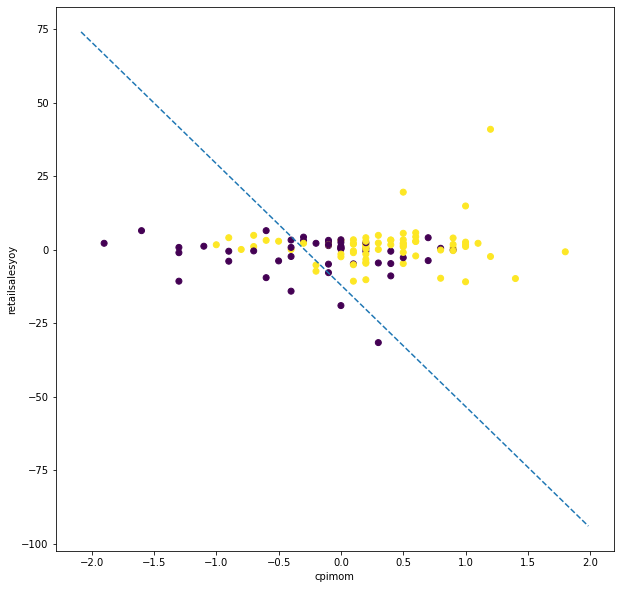

In [8]:
#svm classification
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import  train_test_split
import matplotlib.lines as mlines

svm_clf = Pipeline((
("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=1, loss="hinge")),
))
y=macro.loc[:,macro.columns[1]]>=macro.loc[:,macro.columns[1]].shift(1)
X=macro.loc[:,macro.columns[[0,2]]]
X_train, X_test, y_train, y_test = train_test_split(
                                X,
                                y,
                                train_size   = 0.7,
                                random_state = 1234,
                                shuffle      = False
                            )
svm_clf.fit(X_train,y_train)


sum(svm_clf.predict(X_test)==y_test)/len(y_test)
svm_clf2 = LinearSVC(C=1, loss="hinge").fit(X_train,y_train)
cero=svm_clf2.intercept_[0]
pendiente=(svm_clf2.coef_[0])
graficos.scatterWithCOlor( X,y,cero,pendiente)

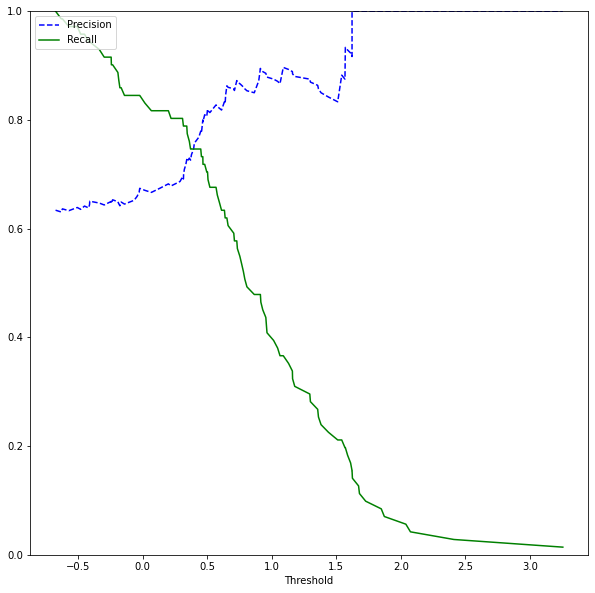

(array([[20, 29],
        [12, 59]]),
 0.625,
 0.40816326530612246,
 0.4938271604938272,
 array([0.625     , 0.67045455]),
 array([0.40816327, 0.83098592]),
 array([0.49382716, 0.74213836]))

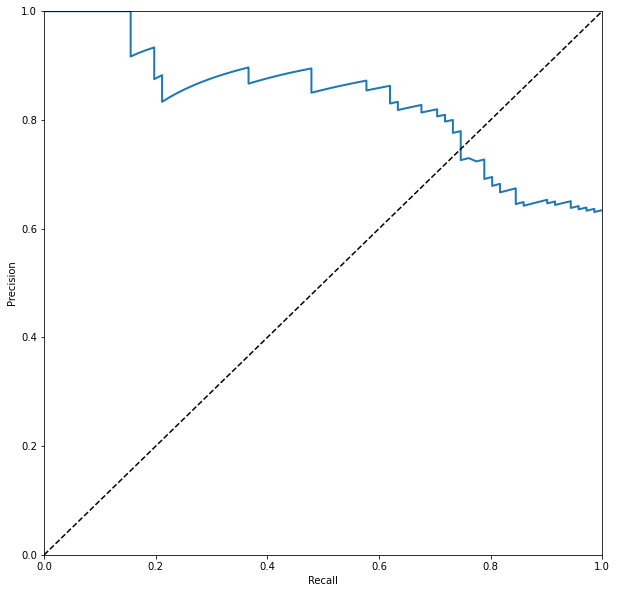

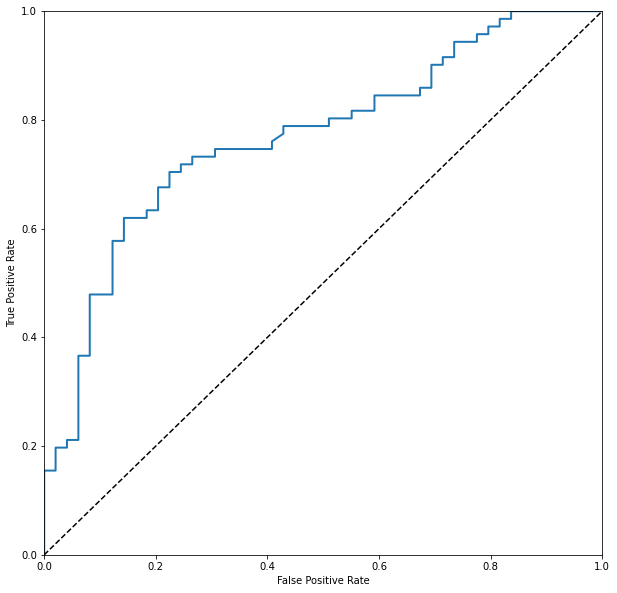

In [9]:
#performance metrics
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
cross_val_score(svm_clf, X, y, cv=6, scoring="accuracy")
y_pred = cross_val_predict(svm_clf, X, y, cv=3)
y_scores = cross_val_predict(svm_clf, X, y, cv=3,method="decision_function")
#confusion matrix: TP FN
                #  FP TN
mat=confusion_matrix(y,y_pred,labels=[False,True])
recall=mat[0,0]/sum(mat[0])
precision=mat[0,0]/sum(mat[:,0])

fpr, tpr, thresholds = roc_curve(y, y_scores)
precisions, recalls, thresholds = precision_recall_curve(y, y_scores)
graficos.plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
graficos. plot_precission_recall(precisions, recalls)
graficos.plot_roc_curve(fpr, tpr, label=None)
mat,precision,recall,2*precision*recall/(precision+recall),precision_score(y,y_pred,labels=[False,True],average=None),recall_score(y,y_pred,labels=[False,True],average=None),f1_score(y,y_pred,labels=[False,True],average=None)

In [10]:
#grid searh of params
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
svc_3=LinearSVC(loss="hinge")
param_grid=[{"C":np.arange(1,200,5)}]
#grid_search = GridSearchCV(svc_3,param_grid, cv=5,
#scoring="f1")
grid_search = GridSearchCV(svc_3,param_grid, cv=3,
scoring="accuracy")
grid_search.fit(X,y)
C=grid_search.best_params_["C"]
svm_clf = Pipeline((
("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=C, loss="hinge")),
))
y_pred = cross_val_predict(svm_clf, X, y, cv=3)

C,precision_score(y,y_pred,labels=[False,True],average=None),\
recall_score(y,y_pred,labels=[False,True],average=None),\
f1_score(y,y_pred,labels=[False,True],average=None),accuracy_score(y,y_pred)


(11,
 array([0.625     , 0.67045455]),
 array([0.40816327, 0.83098592]),
 array([0.49382716, 0.74213836]),
 0.6583333333333333)

In [11]:
#random search of params
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
svc_3=LinearSVC(loss="hinge")
param_grid=[{"C":np.arange(1,200,5)}]
#grid_search = GridSearchCV(svc_3,param_grid, cv=5,
#scoring="f1")
grid_search = RandomizedSearchCV(svc_3,param_grid, cv=3,
scoring="accuracy")
grid_search.fit(X,y)
C=grid_search.best_params_["C"]
svm_clf = Pipeline((
("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=C, loss="hinge")),
))
y_pred = cross_val_predict(svm_clf, X, y, cv=3)

C,precision_score(y,y_pred,labels=[False,True],average=None),\
recall_score(y,y_pred,labels=[False,True],average=None),\
f1_score(y,y_pred,labels=[False,True],average=None),accuracy_score(y,y_pred)

(46,
 array([0.62068966, 0.65934066]),
 array([0.36734694, 0.84507042]),
 array([0.46153846, 0.74074074]),
 0.65)

<h2>Random search in train set and then evaluate accuracy,f1,precision and recall in test set</h2>
<div>We will use:
    <ul>
    <li>Gradient boosting </li>
     <li>Ada boosting </li>
     <li>Random forest </li>
    <li>Decission tree</li>
     <li>Logistic regression</li>
     <li>SVM</li>
    </ul></div>
    

In [12]:
#boosted trees
#Gradient boosting
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
med=0
n=100
y=macro.loc[:,macro.columns[7]]>=macro.loc[:,macro.columns[7]].shift(1)
X=macro.loc[:,macro.columns[:7]]
X_train, X_test, y_train, y_test = train_test_split(
                                X,
                                y,
                                train_size   = 0.7,
                                random_state = 1234,
                                shuffle      = False
                            )
diccionario={e:0 for e in X.columns}
for i in range(n):

    gbrt = GradientBoostingClassifier(max_depth=3, n_estimators=10, learning_rate=0.1)
    #y_pred = cross_val_predict(gbrt , X, y, cv=5)
    #np.mean(y_pred==y)
    param_grid=[{"max_depth":np.arange(1,7,1),"n_estimators":np.arange(1,10,1),"learning_rate":np.arange(0.001,1,0.005)}]
    #grid_search = GridSearchCV(svc_3,param_grid, cv=5,
    #scoring="f1")
    grid_search = RandomizedSearchCV(gbrt ,param_grid, cv=3,
    scoring="accuracy")
    grid_search.fit(X_train,y_train)
    params=grid_search.best_params_
    gbrt = GradientBoostingClassifier(max_depth=params['max_depth'], n_estimators=params['n_estimators'], learning_rate=params['learning_rate'])
    gbrt.fit(X_train,y_train)
    #y_pred = cross_val_predict(gbrt , X, y, cv=3)
    y_pred=gbrt.predict(X_test)
    med+=np.mean(y_pred==y_test)
    for name, score in zip(X.columns,gbrt.feature_importances_):
            diccionario[name]+=score
    

for i,e in diccionario.items():
    diccionario[i]=e/n
diccionario,med/n

({'cpimom': 0.12025466060728977,
  'cpiyoy': 0.15379363457791212,
  'retailsalesyoy': 0.2083115611144632,
  'manufacturingPMI': 0.10249481771862536,
  'industrialProductionYoY': 0.3148776157288069,
  'servicesPMI': 0.07633971280151529,
  'gdpqoq': 0.023927997451387396},
 0.5158333333333335)

<h3>Gradient boosting implementado en modulo auxiliar</h3>

In [90]:
m=len(macro.columns)-1
y=macro.loc[:,macro.columns[m]]>=macro.loc[:,macro.columns[m]].shift(1)
X=macro.loc[:,macro.columns[:m]]
X_train, X_test, y_train, y_test = analyseDataModels.get_train_test(X,y)
n=1
med=0
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
modelos=["gb","ab","rf","dt","svm","lr"]
diccionario={e:0 for e in modelos}
for i in range(n):
    gbrt,p,r,f1,ac,params=analyseDataModels.gradientBoostingClassify(X_train,y_train,X_test,y_test)
    diccionario["gb"]+=ac/n
    gbrt,p,r,f1,ac,params=analyseDataModels.AdaBoostingClassify(X_train,y_train,X_test,y_test)
    diccionario["ab"]+=ac/n                                                             
    gbrt,p,r,f1,ac,params=analyseDataModels.RandomForestClassify(X_train,y_train,X_test,y_test)
    diccionario["rf"]+=ac /n                                                              
    gbrt,p,r,f1,ac,params=analyseDataModels.DecissionTreeClassify(X_train,y_train,X_test,y_test)
    diccionario["dt"]+=ac/n                                                                 
    gbrt,p,r,f1,ac,params=analyseDataModels.LinearSVMClassify(X_train,y_train,X_test,y_test)
    diccionario["svm"]+=ac  /n
    gbrt,p,r,f1,ac,params=analyseDataModels.LogisticRegressionClassify(X_train,y_train,X_test,y_test)
    diccionario["lr"]+=ac/n
diccionario                                                                   
p,r,f1,ac
                                                                     

(array([0.46153846, 0.48      ]),
 array([0.48      , 0.46153846]),
 array([0.47058824, 0.47058824]),
 0.47058823529411764)

In [102]:
pred= gbrt.predict(X_test)
a=np.sum([(pred==True) &(y_test==True)])
b=np.sum([(pred==True) &(y_test==False)])
a/(a+b)
isinstance(ac,float)

True

In [ ]:
#boosted trees
#Ada boosting
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
med=0
n=100
diccionario={e:0 for e in X.columns}
for i in range(n):
  
    
    gbrt = AdaBoostClassifier( n_estimators=10, learning_rate=0.1)
    #y_pred = cross_val_predict(gbrt , X, y, cv=5)
    #np.mean(y_pred==y)
    param_grid=[{"n_estimators":np.arange(1,10,1),"learning_rate":np.arange(0.001,1,0.005)}]
    #grid_search = GridSearchCV(svc_3,param_grid, cv=5,
    #scoring="f1")
    grid_search = RandomizedSearchCV(gbrt ,param_grid, cv=3,
    scoring="accuracy")
    grid_search.fit(X_train,y_train)
    params=grid_search.best_params_
    gbrt = AdaBoostClassifier( n_estimators=params['n_estimators'], learning_rate=params['learning_rate'])
    gbrt.fit(X_train,y_train)
    #y_pred = cross_val_predict(gbrt , X, y, cv=3)
    y_pred=gbrt.predict(X_test)
    med+=np.mean(y_pred==y_test)
    for name, score in zip(X.columns,gbrt.feature_importances_):
        diccionario[name]+=score
    

for i,e in diccionario.items():
    diccionario[i]=e/n
diccionario,med/n

In [ ]:
#random forest
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
med=0
n=100
diccionario={e:0 for e in X.columns}
for i in range(n):
  
    gbrt = RandomForestClassifier(max_depth=3, n_estimators=10, min_samples_split=1)
    #y_pred = cross_val_predict(gbrt , X, y, cv=5)
    #np.mean(y_pred==y)
    param_grid=[{"max_depth":np.arange(1,7,1),"n_estimators":np.arange(1,10,1),"min_samples_split":np.arange(1,10,1)}]
    #grid_search = GridSearchCV(svc_3,param_grid, cv=5,
    #scoring="f1")
    grid_search = RandomizedSearchCV(gbrt ,param_grid, cv=3,
    scoring="accuracy")
    grid_search.fit(X_train,y_train)
    params=grid_search.best_params_
    gbrt = RandomForestClassifier(max_depth=params['max_depth'], n_estimators=params['n_estimators'], min_samples_split=params['min_samples_split'])
    gbrt.fit(X_train,y_train)
    #y_pred = cross_val_predict(gbrt , X, y, cv=3)
    y_pred=gbrt.predict(X_test)
    med+=np.mean(y_pred==y_test)
    for name, score in zip(X.columns,gbrt.feature_importances_):
        diccionario[name]+=score
    

for i,e in diccionario.items():
    diccionario[i]=e/n
diccionario,med/n

In [ ]:
#decission tree
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
med=0
n=100
for i in range(n):
   
    gbrt = DecisionTreeClassifier(max_depth=3, min_samples_split=1)
    #y_pred = cross_val_predict(gbrt , X, y, cv=5)
    #np.mean(y_pred==y)
    param_grid=[{"max_depth":np.arange(1,7,1),"min_samples_split":np.arange(1,10,1)}]
    #grid_search = GridSearchCV(svc_3,param_grid, cv=5,
    #scoring="f1")
    grid_search = RandomizedSearchCV(gbrt ,param_grid, cv=3,
    scoring="accuracy")
    grid_search.fit(X_train,y_train)
    params=grid_search.best_params_
    gbrt = DecisionTreeClassifier(max_depth=params['max_depth'], min_samples_split=params['min_samples_split'])
    gbrt.fit(X_train,y_train)
    #y_pred = cross_val_predict(gbrt , X, y, cv=3)
    y_pred=gbrt.predict(X_test)
    med+=np.mean(y_pred==y_test)
med/n


In [ ]:
#svm
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV#svm
from sklearn.svm import LinearSVC
svm_clf = LinearSVC(C=1, loss="hinge")
n=100
med=0
for i in range(n):
 
    param_grid=[{"C":np.arange(0.1,100,0.5)}]
    #grid_search = GridSearchCV(svc_3,param_grid, cv=5,
    #scoring="f1")
    grid_search = RandomizedSearchCV(svm_clf ,param_grid, cv=3,
    scoring="accuracy")
    grid_search.fit(X_train,y_train)
    params=grid_search.best_params_
    gbrt = LinearSVC(C= params["C"], loss="hinge")
    gbrt.fit(X_train,y_train)
    #y_pred = cross_val_predict(gbrt , X, y, cv=3)
    y_pred=gbrt.predict(X_test)
    med+=np.mean(y_pred==y_test)
med/n


In [3]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
#y_pred = cross_val_predict(gbrt , X, y, cv=3)
y_pred=log_reg.predict(X_test)
np.mean(y_pred==y_test)

NameError: name 'X_train' is not defined

<h2>Lastly we are gonna try the same using first two PCA components: </h2>

Clearly in this case reducing dimensions works better: results are the same or better and trining lasts less time.

In [4]:
#Gradient boosting classifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
med=0
n=100
y=macro.loc[:,macro.columns[7]].shift(-1)>=macro.loc[:,macro.columns[7]]
X,pca=analyseDataModels.pca(macro,includeClose=False,n_components=2)
X=pd.DataFrame(X)
X.index=macro.index
X["close"]=macro.loc[:,"Close"]
X_train, X_test, y_train, y_test = train_test_split(
                                X,
                                y,
                                train_size   = 0.7,
                                random_state = 1234,
                                shuffle      = False
                            )
diccionario={e:0 for e in X.columns}
for i in range(n):

    gbrt = GradientBoostingClassifier(max_depth=3, n_estimators=10, learning_rate=0.1)
    #y_pred = cross_val_predict(gbrt , X, y, cv=5)
    #np.mean(y_pred==y)
    param_grid=[{"max_depth":np.arange(1,7,1),"n_estimators":np.arange(1,10,1),"learning_rate":np.arange(0.001,1,0.005)}]
    #grid_search = GridSearchCV(svc_3,param_grid, cv=5,
    #scoring="f1")
    grid_search = RandomizedSearchCV(gbrt ,param_grid, cv=3,
    scoring="accuracy")
    grid_search.fit(X_train,y_train)
    params=grid_search.best_params_
    gbrt = GradientBoostingClassifier(max_depth=params['max_depth'], n_estimators=params['n_estimators'], learning_rate=params['learning_rate'])
    gbrt.fit(X_train,y_train)
    #y_pred = cross_val_predict(gbrt , X, y, cv=3)
    y_pred=gbrt.predict(X_test)
    med+=np.mean(y_pred==y_test)
    for name, score in zip(X.columns,gbrt.feature_importances_):
            diccionario[name]+=score
    

for i,e in diccionario.items():
    diccionario[i]=e/n
diccionario,med/n

NameError: name 'macro' is not defined

In [21]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
med=0
n=100
diccionario={e:0 for e in X.columns}
for i in range(n):

    gbrt = RandomForestClassifier(max_depth=3, n_estimators=10)
    #y_pred = cross_val_predict(gbrt , X, y, cv=5)
    #np.mean(y_pred==y)
    param_grid=[{"max_depth":np.arange(1,7,1),"n_estimators":np.arange(1,10,1),"min_samples_split":np.arange(1,10,1)}]
    #grid_search = GridSearchCV(svc_3,param_grid, cv=5,
    #scoring="f1")
    grid_search = RandomizedSearchCV(gbrt ,param_grid, cv=3,
    scoring="accuracy")
    grid_search.fit(X_train,y_train)
    params=grid_search.best_params_
    gbrt = RandomForestClassifier(max_depth=params['max_depth'], n_estimators=params['n_estimators'],min_samples_split=params["min_samples_split"])
    gbrt.fit(X_train,y_train)
    #y_pred = cross_val_predict(gbrt , X, y, cv=3)
    y_pred=gbrt.predict(X_test)
    med+=np.mean(y_pred==y_test)
    for name, score in zip(X.columns,gbrt.feature_importances_):
            diccionario[name]+=score
    

for i,e in diccionario.items():
    diccionario[i]=e/n
diccionario,med/n

({0: 0.3516660830924367, 1: 0.33094690862532394, 'close': 0.3173870082822392},
 0.5247222222222225)